In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("modified_tain.csv")

In [ ]:
df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [5]:
df.dropna(inplace=True)

df.info()

In [6]:
df_numercal=df.drop(["Gender","Customer Type","Type of Travel","Class","satisfaction"],axis=1)

In [7]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,3862,Male,Loyal Customer,21,Business travel,Business,213,2,2,2,...,2,1,2,3,2,4,2,124,129.0,neutral or dissatisfied
1,26300,Male,Loyal Customer,44,Personal Travel,Eco,1199,2,4,2,...,3,3,4,4,2,3,3,0,2.0,neutral or dissatisfied
2,44192,Male,Loyal Customer,41,Business travel,Eco,157,4,2,2,...,4,3,1,4,1,4,4,0,0.0,satisfied
3,30041,Male,Loyal Customer,54,Business travel,Eco,213,2,4,4,...,4,5,4,3,2,2,2,172,168.0,neutral or dissatisfied
4,86605,Male,disloyal Customer,42,Business travel,Business,746,4,4,4,...,3,3,2,4,3,5,3,6,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83118,115588,Male,Loyal Customer,46,Business travel,Eco,337,2,3,3,...,2,1,2,4,1,3,2,0,6.0,neutral or dissatisfied
83119,28142,Male,disloyal Customer,23,Business travel,Eco,859,3,3,3,...,2,4,5,3,4,3,2,0,0.0,neutral or dissatisfied
83120,25944,Male,Loyal Customer,38,Personal Travel,Eco Plus,594,2,2,2,...,4,4,4,4,2,3,4,32,24.0,neutral or dissatisfied
83121,9790,Female,Loyal Customer,20,Personal Travel,Eco,382,5,5,5,...,4,3,3,4,4,4,4,0,0.0,satisfied


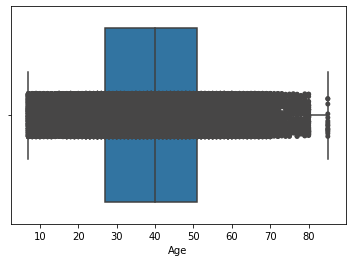

In [8]:
sns.boxplot(x='Age', data=df_numercal)
sns.stripplot(x='Age', data=df_numercal, color="#474646")

In [9]:
outliers_indices = detect_outliers(df_numercal, 0, df_numercal.columns)
len(outliers_indices)

23053

In [10]:
df["satisfaction"].value_counts()

neutral or dissatisfied    47005
satisfied                  35864
Name: satisfaction, dtype: int64

In [11]:
df["Customer Type"].value_counts()

Loyal Customer       67698
disloyal Customer    15171
Name: Customer Type, dtype: int64

In [12]:
df["Type of Travel"].value_counts()

Business travel    57183
Personal Travel    25686
Name: Type of Travel, dtype: int64

In [13]:
df["Class"].value_counts()

Business    39673
Eco         37218
Eco Plus     5978
Name: Class, dtype: int64

In [14]:
X=df.drop("satisfaction",axis=1)
y=df["satisfaction"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
encoder=ce.OneHotEncoder(cols=["Customer Type","Type of Travel","Class","Gender"])
# encoder1=ce.OneHotEncoder(cols=["satisfaction"])

In [17]:
encoding_xtrain=encoder.fit_transform(X_train)
encoding_xtest=encoder.transform(X_test)

In [45]:
encoding_xtrain

,id,Gender_1,Gender_2,Customer Type_1,Customer Type_2,Age,Type of Travel_1,Type of Travel_2,Class_1,Class_2,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
23662,66058,1,0,1,0,66,1,0,1,0,...,3,3,3,3,3,1,3,3,42,41.0
78240,10192,0,1,1,0,44,1,0,1,0,...,4,4,4,4,4,3,4,3,14,4.0
25624,1194,0,1,1,0,51,0,1,0,1,...,5,4,4,3,1,3,4,3,0,0.0
77867,99683,0,1,1,0,49,1,0,1,0,...,4,4,4,4,4,5,4,3,7,11.0
19497,68713,0,1,1,0,10,0,1,0,1,...,1,1,3,5,4,5,4,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,87606,0,1,1,0,35,1,0,1,0,...,4,3,3,3,3,3,3,3,0,0.0
55055,105407,0,1,1,0,31,1,0,1,0,...,5,5,3,4,5,5,4,5,0,0.0
77061,17538,0,1,1,0,18,0,1,0,1,...,2,2,3,1,2,1,3,2,0,0.0
863,38703,1,0,1,0,36,1,0,1,0,...,3,4,1,1,2,3,1,3,192,179.0


In [18]:
# encoding_y_train=encoder1.fit_transform(y_train)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
StandardScaler=StandardScaler()
MinMaxScaler=MinMaxScaler()

In [21]:
#scaling_encoding_xtrain=StandardScaler.fit_transform(encoding_xtrain)
scaling_encoding_xtrain=MinMaxScaler.fit_transform(encoding_xtrain)


In [22]:
scaling_encoding_xtest=MinMaxScaler.transform(encoding_xtest)


In [23]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=16)

In [ ]:
logreg.fit(scaling_encoding_xtrain, y_train)

In [26]:
logreg.score(scaling_encoding_xtrain, y_train)

0.8767515579409964

In [27]:
y_pred = logreg.predict(scaling_encoding_xtest)

In [28]:
accuracy_score(y_pred,y_test)

0.8760010238783047

In [29]:
X_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
23662,66058,Male,Loyal Customer,66,Business travel,Business,3829,3,5,5,...,3,3,3,3,3,1,3,3,42,41.0
78240,10192,Female,Loyal Customer,44,Business travel,Business,3578,2,5,2,...,4,4,4,4,4,3,4,3,14,4.0
25624,1194,Female,Loyal Customer,51,Personal Travel,Eco,158,3,5,3,...,5,4,4,3,1,3,4,3,0,0.0
77867,99683,Female,Loyal Customer,49,Business travel,Business,442,3,3,3,...,4,4,4,4,4,5,4,3,7,11.0
19497,68713,Female,Loyal Customer,10,Personal Travel,Eco,175,1,5,1,...,1,1,3,5,4,5,4,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,87606,Female,Loyal Customer,35,Business travel,Business,2319,4,4,4,...,4,3,3,3,3,3,3,3,0,0.0
55055,105407,Female,Loyal Customer,31,Business travel,Business,3348,3,3,3,...,5,5,3,4,5,5,4,5,0,0.0
77061,17538,Female,Loyal Customer,18,Personal Travel,Eco,252,4,5,0,...,2,2,3,1,2,1,3,2,0,0.0
863,38703,Male,Loyal Customer,36,Business travel,Business,2583,3,4,4,...,3,4,1,1,2,3,1,3,192,179.0


In [128]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [38]:
logregggg = LogisticRegression(random_state=16)

In [39]:
scaling_encoding_xtrain.shape

(55522, 28)

In [40]:
y_train.shape

(55522,)

In [41]:
# encoding_y_train

In [104]:
scaling_encoding_xtrain=pd.DataFrame(scaling_encoding_xtrain, columns=encoding_xtrain.columns)

In [105]:
seq_model= sfs(logregggg,
        k_features=18,
        forward=True,
        cv=7,
        scoring="accuracy"
)

In [106]:
#seq_model.fit(scaling_encoding_xtrain,y_train)

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ANACONDA64\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warnin

SequentialFeatureSelector(cv=7, estimator=LogisticRegression(random_state=16),
                          k_features=(18, 18), scoring='accuracy')

In [107]:
feat_names=list(seq_model.k_feature_names_)

In [108]:
feat_names

['id',
 'Customer Type_1',
 'Type of Travel_1',
 'Type of Travel_2',
 'Class_1',
 'Class_3',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Online boarding',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes']

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
log=LogisticRegression(penalty='l1',random_state=16,solver='liblinear')

In [111]:
log.fit(encoding_xtrain[['id',
 'Customer Type_1',
 'Type of Travel_1',
'Type of Travel_2',
 'Class_1',
 'Class_3',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Online boarding',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes']],y_train)

LogisticRegression(penalty='l1', random_state=16, solver='liblinear')

In [112]:
log.score(encoding_xtrain[['id',
 'Customer Type_1',
 'Type of Travel_1',
 'Type of Travel_2',
 'Class_1',
 'Class_3',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Online boarding',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes']],y_train)

0.8768416123338496

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
sfs0 = sfs(RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=0), 
           k_features=10, # the more features we want, the longer it will take to run
           forward=True, 
           floating=False, # see the docs for more details in this parameter
           verbose=2, # this indicates how much to print out intermediate steps
           scoring='roc_auc',
           cv=2,
         )



In [133]:
sfs0.fit(scaling_encoding_xtrain,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   30.4s finished

[2023-05-09 15:02:42] Features: 1/10 -- score: 0.8340650222306564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   26.6s finished

[2023-05-09 15:03:09] Features: 2/10 -- score: 0.9078007881930487[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   26.7s finished

[2023-05-09 15:03:36] Features: 3/10 -- score: 0.9596221297271267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(n_jobs=4,
                                                           random_state=0),
                          k_features=(10, 10), scoring='roc_auc', verbose=2)

In [136]:
feat_names=list(sfs0.k_feature_names_)

In [137]:
feat_names

['Customer Type_1',
 'Customer Type_2',
 'Type of Travel_1',
 'Type of Travel_2',
 'Class_1',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Baggage handling',
 'Inflight service']

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
fr=RandomForestClassifier()

In [140]:
fr.fit(scaling_encoding_xtrain[['Customer Type_1',
 'Customer Type_2',
 'Type of Travel_1',
 'Type of Travel_2',
 'Class_1',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Baggage handling',
 'Inflight service']],y_train)

RandomForestClassifier()

In [141]:
fr.score(scaling_encoding_xtrain[['Customer Type_1',
 'Customer Type_2',
 'Type of Travel_1',
 'Type of Travel_2',
 'Class_1',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Baggage handling',
 'Inflight service']],y_train)

0.9616908612802132